In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [18]:
data_rnn = pd.read_csv("archive/daily/AALI.csv")
data_rnn.head()

,timestamp,open,low,high,close,volume
0,2001-04-16,524,524,547,547,342131
1,2001-04-17,547,524,571,524,345804
2,2001-04-18,547,524,547,524,230361
3,2001-04-19,524,500,524,500,457574
4,2001-04-20,476,452,476,452,228262


In [19]:
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
data_rnn.set_index('timestamp', inplace=True)
data_rnn.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_rnn = scaler.fit_transform(data_rnn)

In [21]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length, 3])  # Close price is the target
    return np.array(sequences), np.array(targets)

In [22]:
seq_length = 60
sequences, targets = create_sequences(scaled_data_rnn, seq_length)

In [23]:
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = targets[:train_size], targets[train_size:]

In [24]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 5)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

f:\KULIAH\SEM 4\MachineLearning\FinalProject\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.0171 - val_loss: 3.4718e-04
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 0.0029 - val_loss: 2.8095e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0024 - val_loss: 2.5636e-04
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - loss: 0.0023 - val_loss: 7.0562e-04
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 0.0023 - val_loss: 5.5978e-04
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - loss: 0.0022 - val_loss: 2.4186e-04
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - loss: 0.0018 - val_loss: 3.2912e-04
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - loss: 0.0018 - val_loss: 1.9631e-04
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0016 - val_loss: 3.0838e-04
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - loss: 0.0016 - val_loss: 2.9045e-04


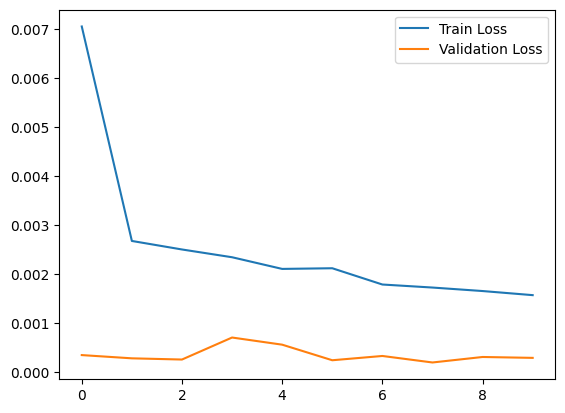

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [28]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 3)), predictions, np.zeros((predictions.shape[0], 1))), axis=1))[:, 3]

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


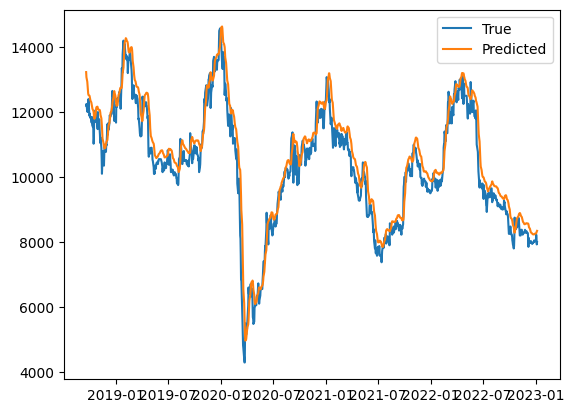

In [29]:
plt.plot(data_rnn.index[-len(y_test):], scaler.inverse_transform(scaled_data_rnn)[-len(y_test):, 3], label='True')
plt.plot(data_rnn.index[-len(y_test):], predictions, label='Predicted')
plt.legend()
plt.show()